# 1- Intro...

we're going to make some analysis and visualizations of the BigMart sales data to know the current situation and and see if there's any helpful pattern also see if there's anything unusual.
then we'll build a model that using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [1]:
# import libraries
import os
import numpy as np 
import pandas as pd 

#for Visual
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from IPython.display import Image

#for ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# for Estimating Time
import time

#for clean warnings
import warnings# warning filter
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will 

In [2]:
#read data
train = pd.read_csv('D:\Work\Technolabs internship\Lec1 (intro)\Task1/Train.csv')
test = pd.read_csv('D:\Work\Technolabs internship\Lec1 (intro)\Task1/Test.csv')

# 2- EDA

In [3]:
print('Train data head:-\n\n', train.head(),'\n\n------------------\n\nTest data head:-\n\n',test.head())

Train data head:-

   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Mediu

In [4]:
#let's take a quick look on the data...
print('Train shape: ', train.shape,'\n\n ------------------\n\n', 'Test shape: ', test.shape, '\n\n------------------\n\ntrain Describtion:- \n\n', train.describe(),'\n------------------\n\n train\'s quick look:-\n\n', train.info )

Train shape:  (8523, 12) 

 ------------------

 Test shape:  (5681, 11) 

------------------

train Describtion:- 

        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%     

In [5]:
# we'll work on the train data so let's focus on it...
df = train

In [6]:
df.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6418,NCG43,NaN,Low Fat,0.129984,Household,93.0462,OUT019,1985,Small,Tier 1,Grocery Store,185.0924


In [7]:
# Exploring nulls in the data
null_count = df.isnull().sum()
null_count

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Exploring the unique values in every feature
for i in df:
    print(f'the unique values of (( {i} )):\n\n', df[i].unique(),('\n-------------------------\n'))

the unique values of (( Item_Identifier )):

 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 
-------------------------

the unique values of (( Item_Weight )):

 [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  

In [9]:
# we can see that there's a duplicated unique values in "Item_Fat_Content" so we have to standarize the names..
# we'll replace 'low fat' and 'LF' with 'Low Fat', and 'reg' with 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [10]:
# I see null values in Outlet_Size feature so let's take a look on it
nulls = df['Outlet_Size'].isnull().sum()
print('nulls number = ', nulls,'\n\n', 'nulls percentage = ', nulls/len(df['Outlet_Size'])*100,'%' )

nulls number =  2410 

 nulls percentage =  28.27642848762173 %


In [11]:
# Let's see how'll we handle it...
# First let's check the nulls in the test data too to see if that's normal
null_count = test.isnull().sum()
null_count

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Handling Null Values
##### 'Item_Weight'
Since 'Item_Weight' is a numerical column, we have several options:

- Imputation with Mean/Median

- Predictive Imputation (using ML)

- Group-Based Imputation (using a related variable's mean)



##### 'Outlet_Size'

Handling Null Values in 'Outlet_Size'
'Outlet_Size' is a categorical variable, so the strategies are different:

- Mode Imputation

- Predictive Imputation (using ML)

- Create a New Category (replace with string value)

- Relationship-Based Imputation (using a related variable)

In [12]:
'''
I see the best way to handle the null data will be using ML models to predict them depending on the related variables, but..
as I really have no time now beside that I hate to add values depending on the guessing,
so I'd love to replace the null values of 'Outlet_Size' with string ('Unknown'),
And for 'Item_Weight' I'll use the mean 
'''
# Assuming df_train and df_test are my training and testing dataframes respectively
# Replace null values in 'Outlet_Size' with 'Unknown' in both datasets
df['Outlet_Size'].fillna('Unknown', inplace=True)
test['Outlet_Size'].fillna('Unknown', inplace=True)

# Calculate the mean of 'Item_Weight' from the training set
mean_item_weight = df['Item_Weight'].mean()

# Replace null values in 'Item_Weight' with the mean in both datasets
df['Item_Weight'].fillna(mean_item_weight, inplace=True)
test['Item_Weight'].fillna(mean_item_weight, inplace=True)

In [13]:
# Let's see how'll we handle it...
# First let's check the nulls in the test data too to see if that's normal
df_null_count = test.isnull().sum()
test_null_count = test.isnull().sum()
print (df_null_count,'\n\n', test_null_count)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64 

 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [14]:
#Checking the data formates:-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
# checking if there's any duplicated rows
duplicated_rows = df[df.duplicated()] 
len(duplicated_rows[:])

0

In [16]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [17]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Unknown,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Unknown,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Unknown,Tier 2,Supermarket Type1
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Unknown,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Unknown,Tier 2,Supermarket Type1


In [18]:
# I'll drop the first column cuz it's useless 
import pandas as pd

df = df.drop(df.columns[0], axis=1)
test = test.drop(test.columns[0], axis=1)

df,test

(      Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
 0           9.300          Low Fat         0.016047                  Dairy   
 1           5.920          Regular         0.019278            Soft Drinks   
 2          17.500          Low Fat         0.016760                   Meat   
 3          19.200          Regular         0.000000  Fruits and Vegetables   
 4           8.930          Low Fat         0.000000              Household   
 ...           ...              ...              ...                    ...   
 8518        6.865          Low Fat         0.056783            Snack Foods   
 8519        8.380          Regular         0.046982           Baking Goods   
 8520       10.600          Low Fat         0.035186     Health and Hygiene   
 8521        7.210          Regular         0.145221            Snack Foods   
 8522       14.800          Low Fat         0.044878            Soft Drinks   
 
       Item_MRP Outlet_Identifier  Outlet_Establis

In [19]:
# Save the progress 
df.to_csv('df_train.csv', index=False)

# 3- Data Visualization

I'd love to visualize some data it'll be very helpful  for the stakeholder in the business beside it'll give us some hints too...
I'll use Power BI cuz I'm faster with it and I have no time

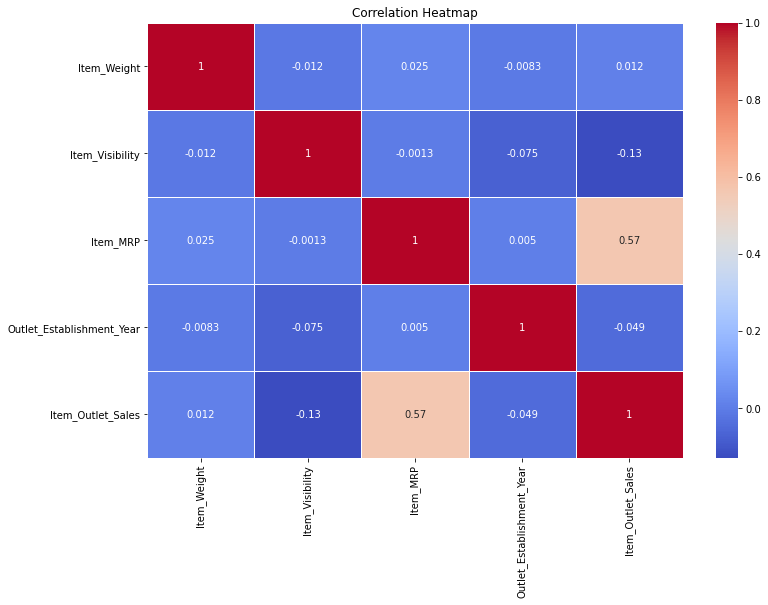

In [20]:
# Before the visualization I want to take a look on the correlation of the data...

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Sum of Item Outlet Sales')

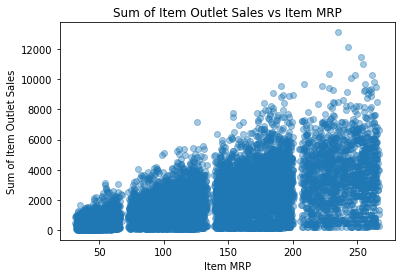

In [21]:
# let's start with taking a look on that strong relationship between : Item_MRP vs Outlet_Sales

plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'], alpha=0.4)
plt.title('Sum of Item Outlet Sales vs Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Sum of Item Outlet Sales')


The percentages due to Items number:-



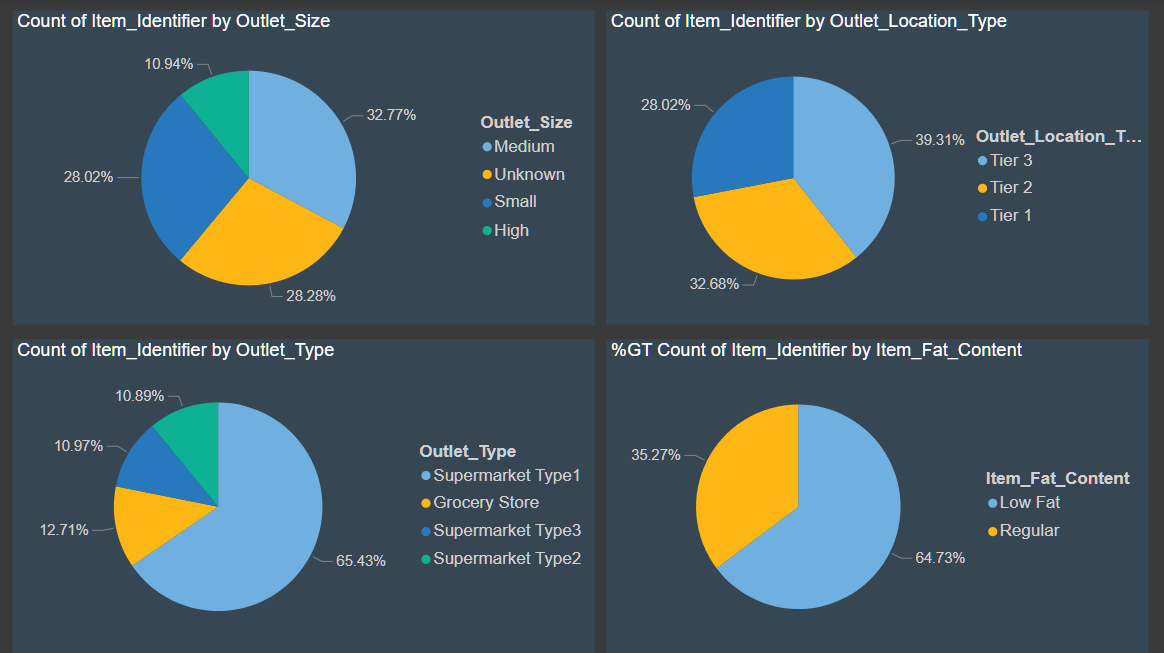

In [22]:
print('\nThe percentages due to Items number:-\n')

Image(filename='D:\Work\Technolabs internship\Lec1 (intro)\Task1\Analysis_visual\percentages_due_Items.png')


The percentages due to Sales:-



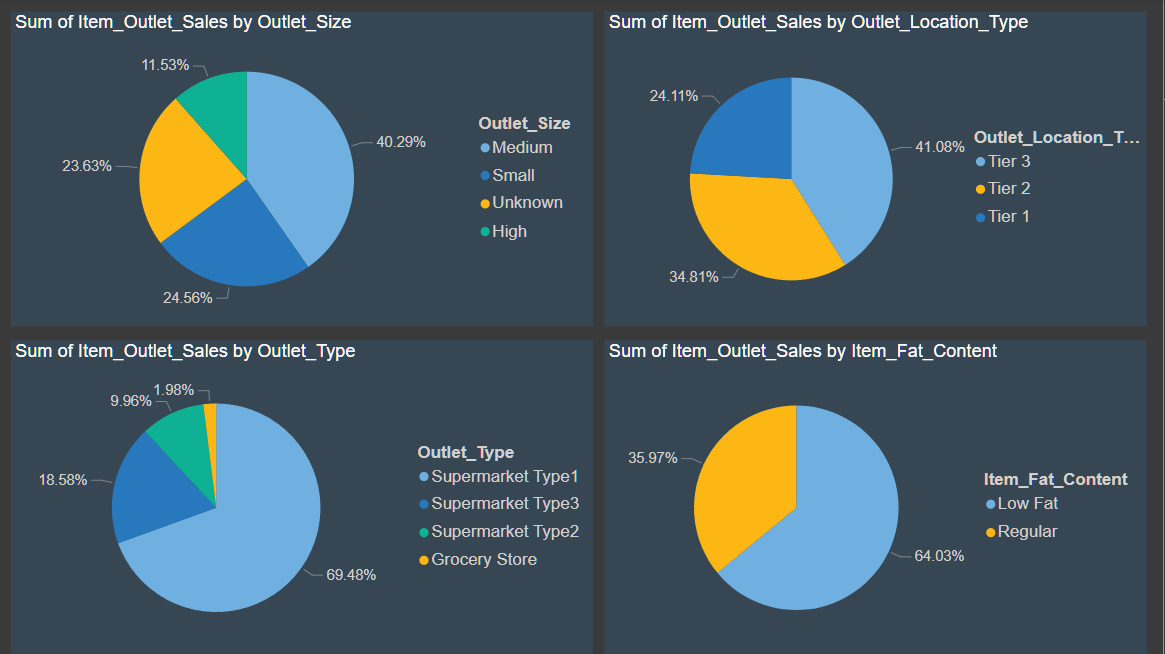

In [23]:
print('\nThe percentages due to Sales:-\n')
Image(filename='D:\Work\Technolabs internship\Lec1 (intro)\Task1\Analysis_visual\percentages_due_Sales.png')

### Numbers and Sales Comparison 

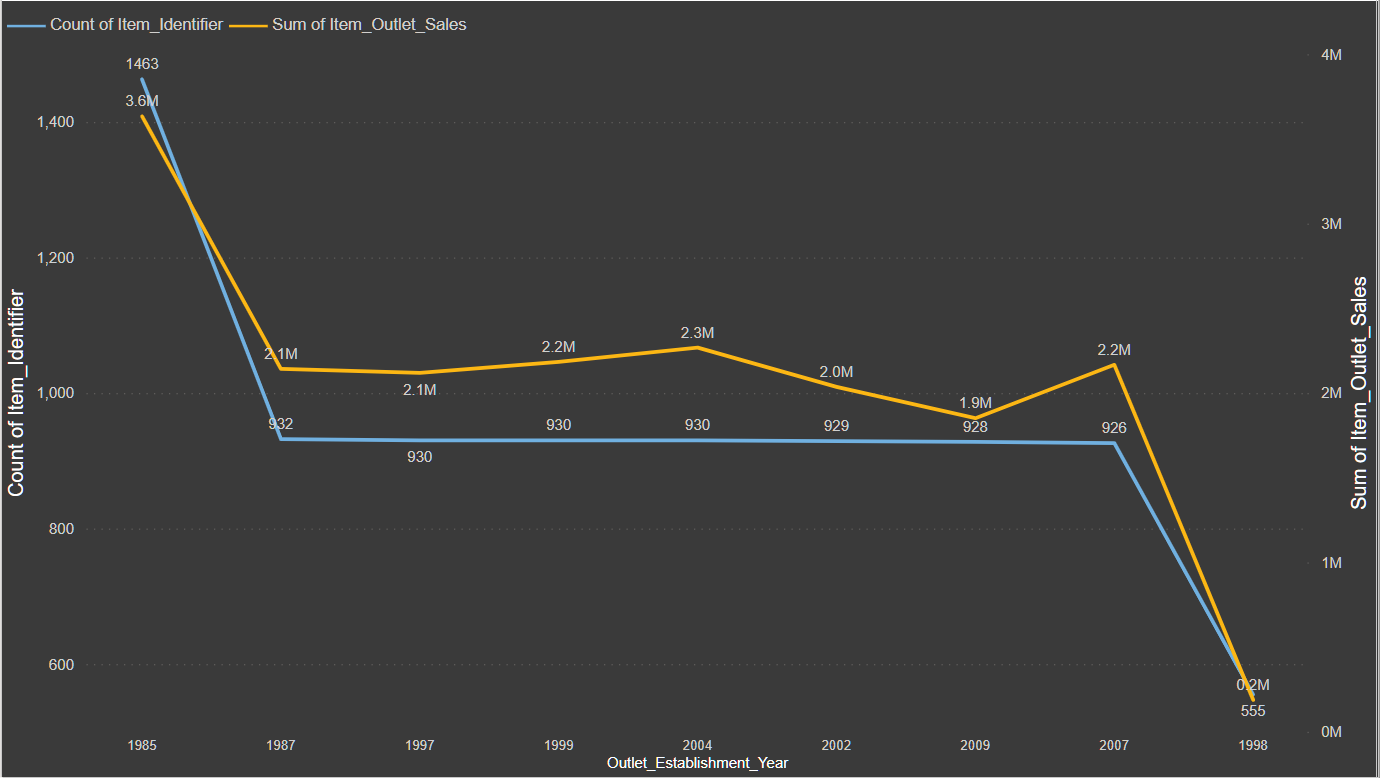

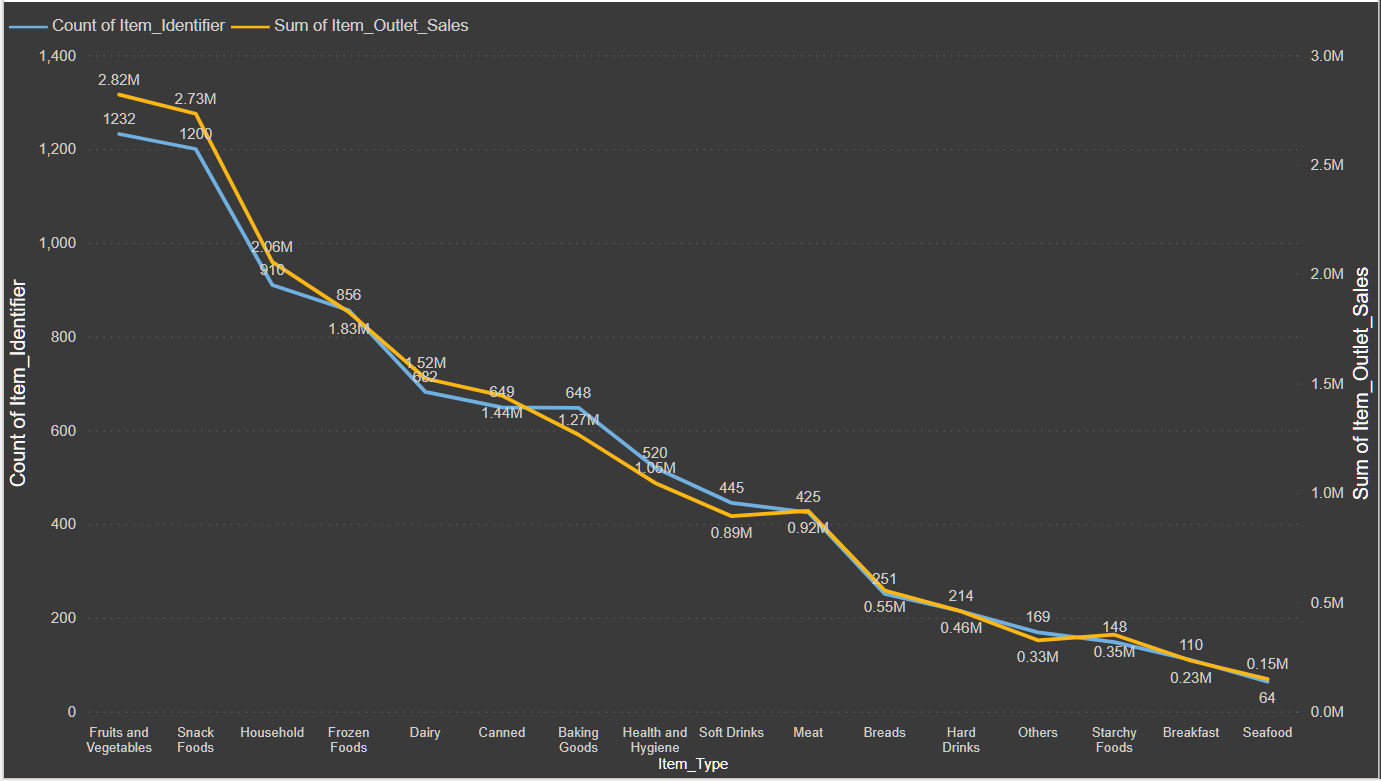

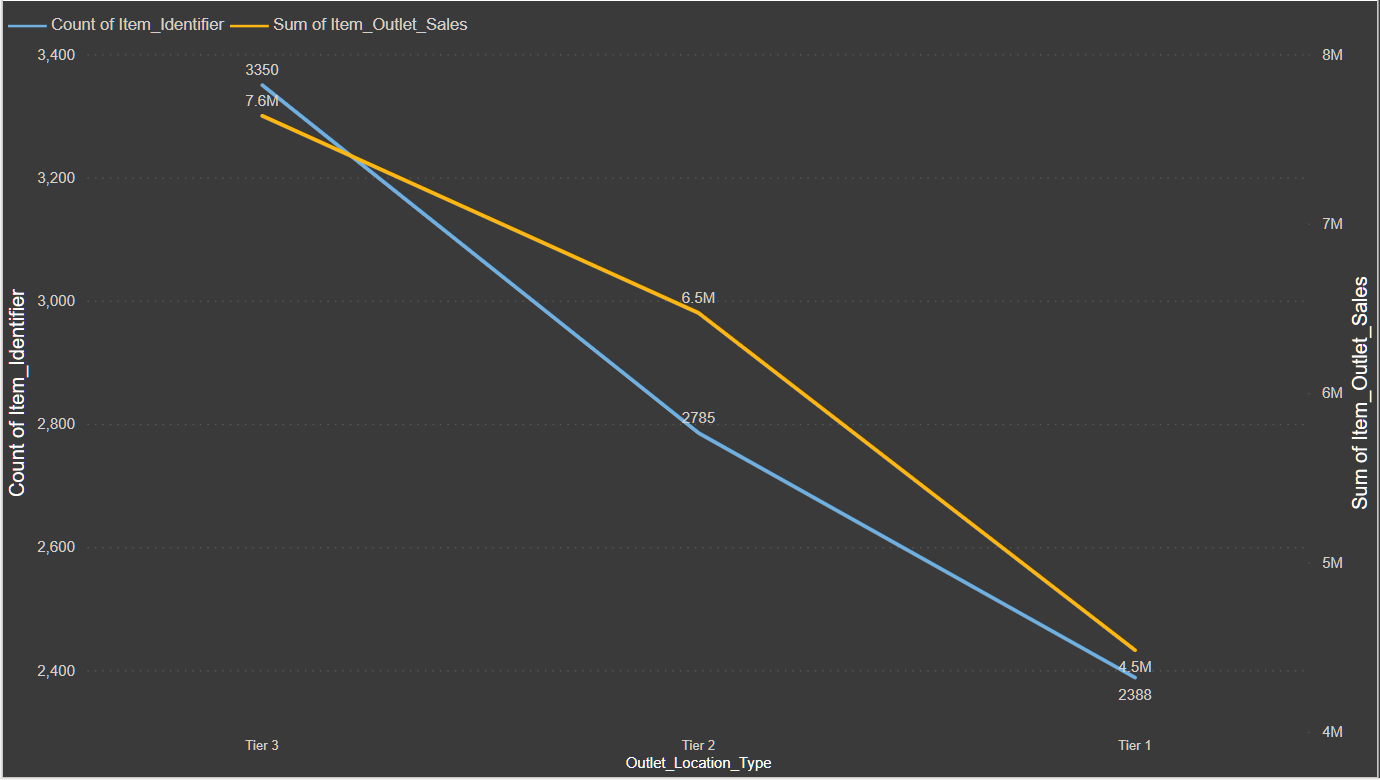

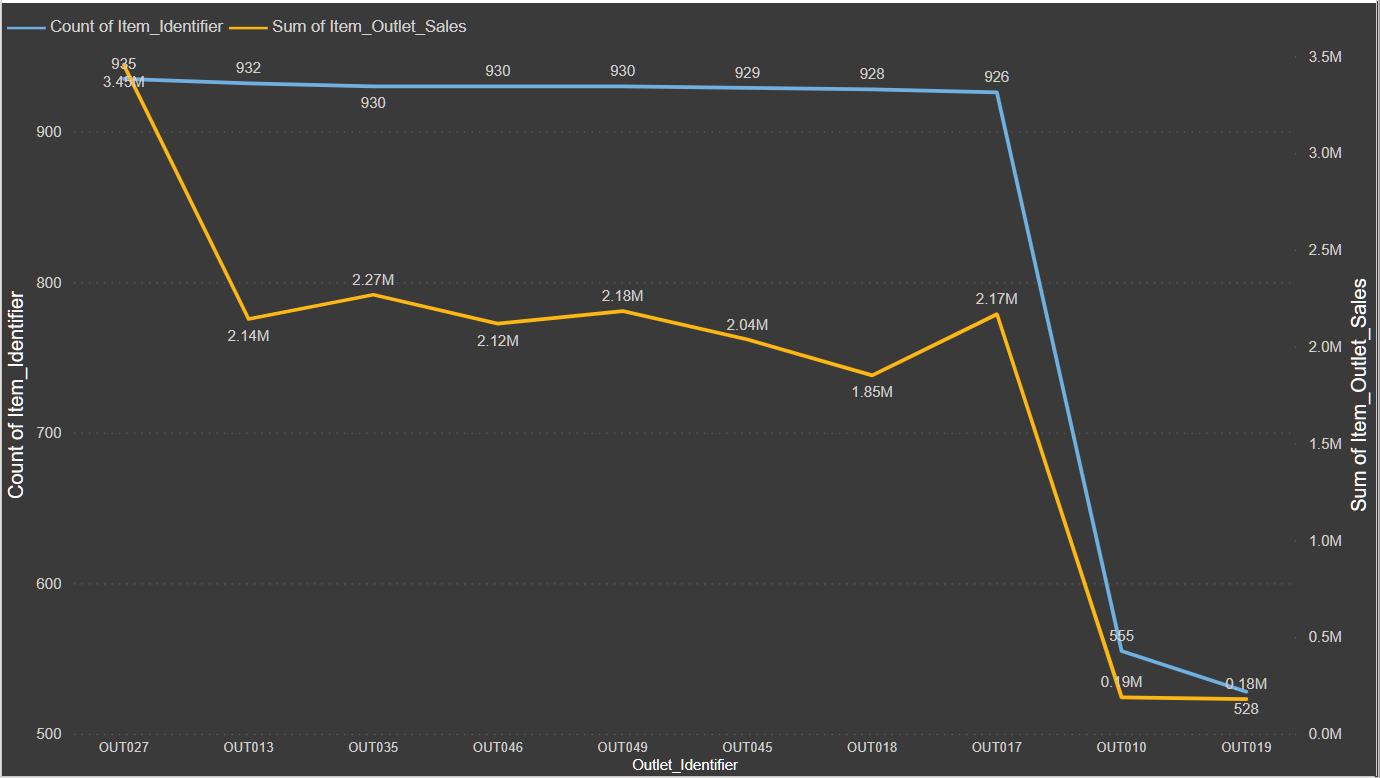

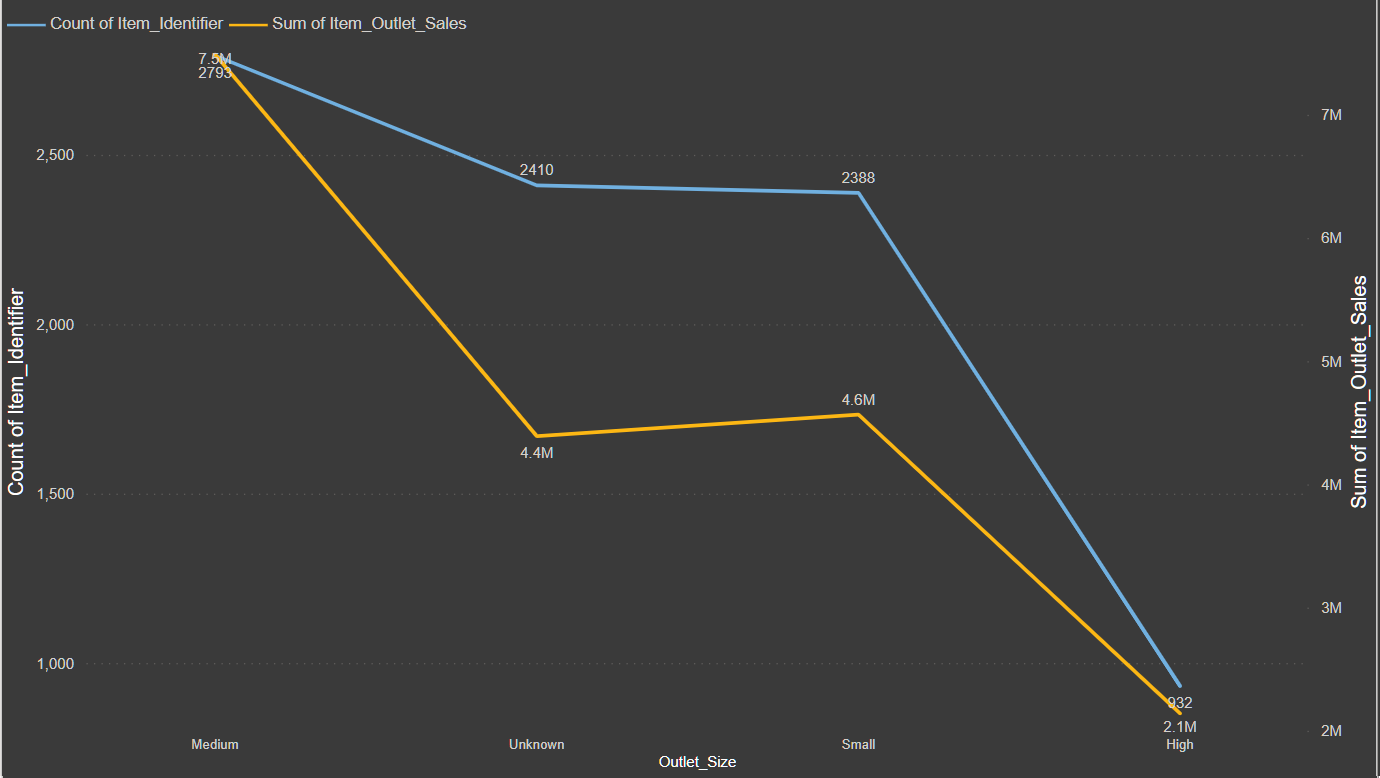

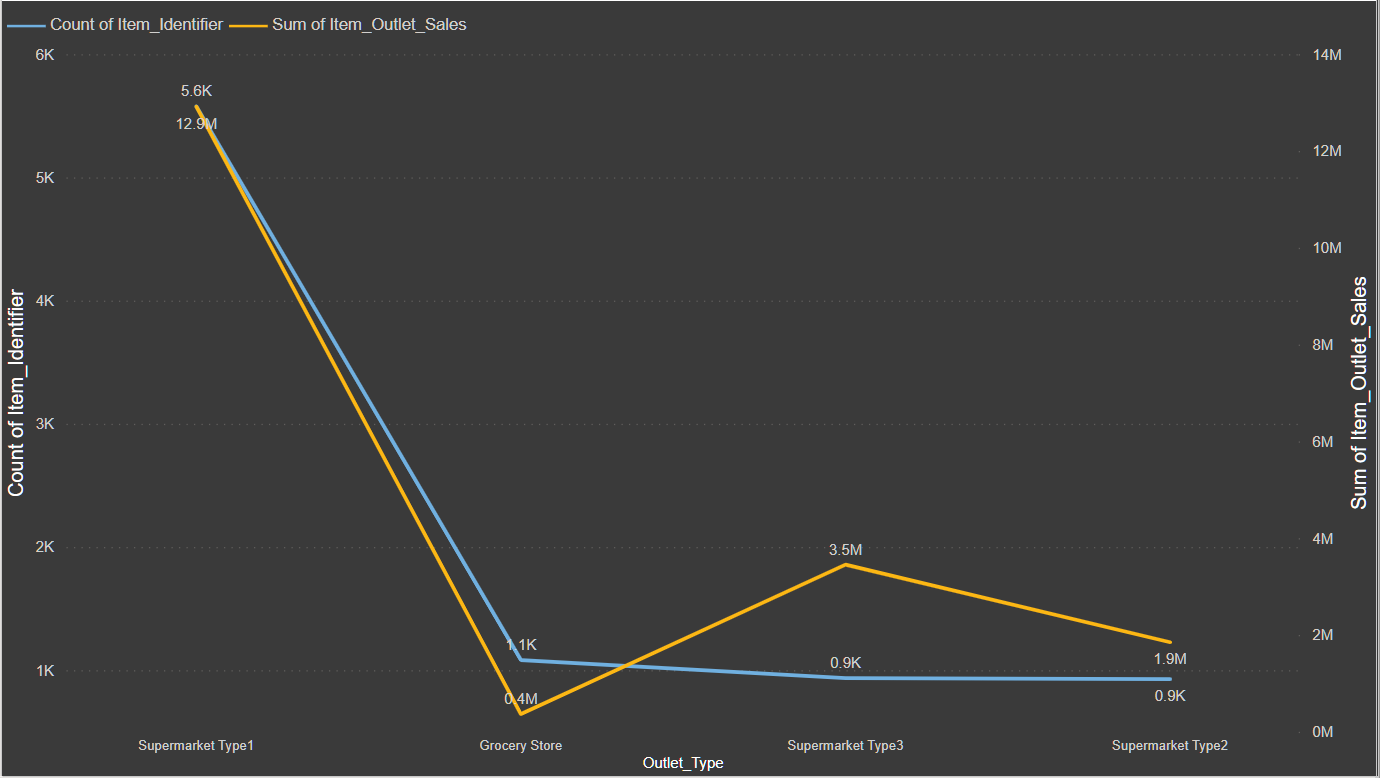

In [24]:
from IPython.display import Image, display

C_pics = [
    Image(filename='D:\\Work\\Technolabs internship\\Lec1 (intro)\\Task1\\Analysis_visual\\Establishment_year.png', width=500, height=500),
    Image(filename='D:\\Work\\Technolabs internship\\Lec1 (intro)\\Task1\\Analysis_visual\\Item_type.png', width=500, height=500),
    Image(filename='D:\\Work\\Technolabs internship\\Lec1 (intro)\\Task1\\Analysis_visual\\location_type.png', width=500, height=500),
    Image(filename='D:\\Work\\Technolabs internship\\Lec1 (intro)\\Task1\\Analysis_visual\\Outlet_Identifier.png', width=500, height=500),
    Image(filename='D:\\Work\\Technolabs internship\\Lec1 (intro)\\Task1\\Analysis_visual\\Outlet_Size.png', width=500, height=500),
    Image(filename='D:\\Work\\Technolabs internship\\Lec1 (intro)\\Task1\\Analysis_visual\\Outlet_type.png', width=500, height=500)
]

for pic in C_pics:
    display(pic)


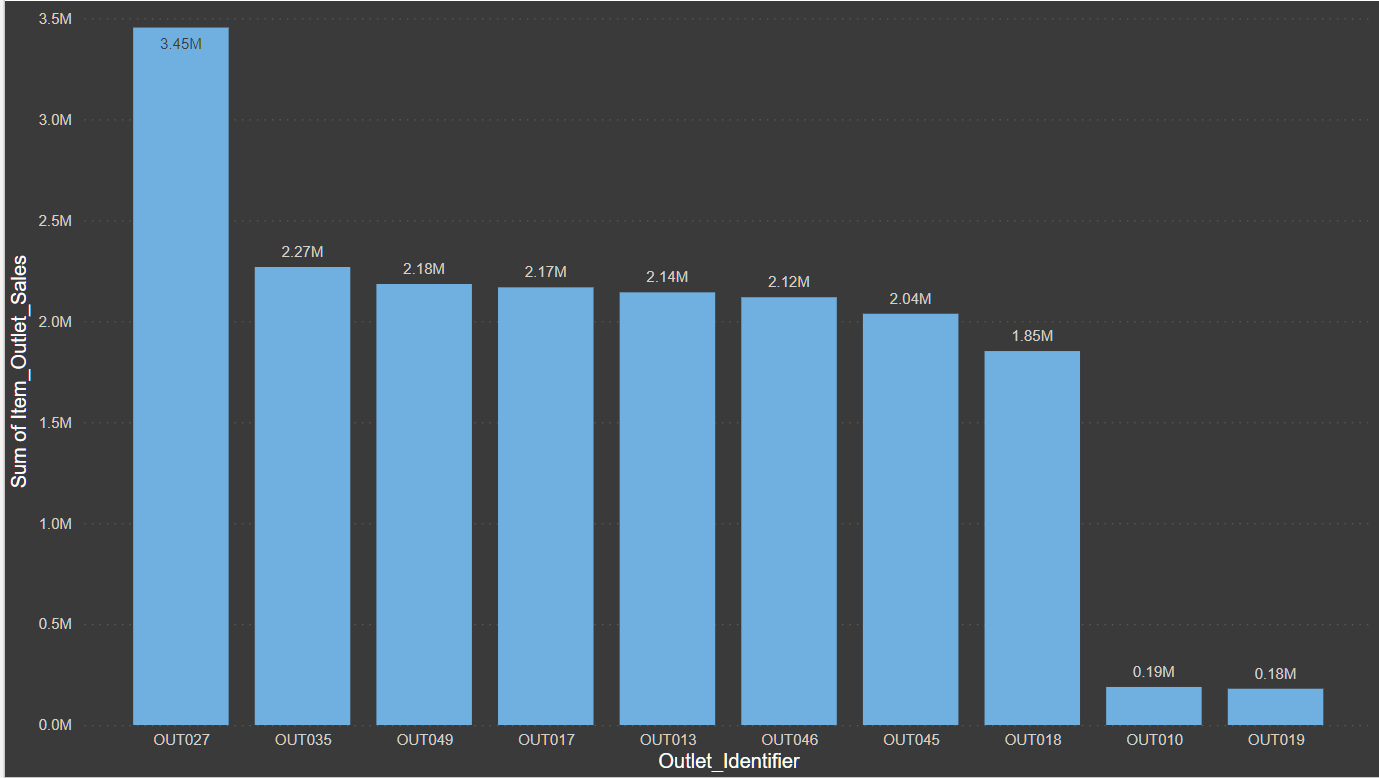

In [25]:
 Image(filename='D:\Work\Technolabs internship\Lec1 (intro)\Task1\Analysis_visual\Outlet_identifiers.png')

# Visuals conclusions...
- the only term which is sounds clear that has a positive relation pattern with the outlet sales is Item MRP
- it's noticeable that the "High" Size sales is a way less than the other 2 sizes, on the other hand the Medium size makes a very high sales.
- Tier 3 has the most sales and numbers.
- the Supermarket Type1 has the largest share of sales with about 70%, Grocery Store has the minimum with about 2%
- although the numbers of Grocery has 12.7% but it has just 2% of sales !!! , on the other hand Supermarket tyoe3 has a pretty good gap between its sales and the items numbers.
- the Low Fat products makes Sales (64%) a way higher tham Regular (36%)
- the outlet which established in 1985 has the most sales with a way distance to others, otherwise that established at 1998 has the lowest sales, the others has almost a near avg records.
- Fruits and Vegetables & Snack foods makes the most numbers and sales with a far way from the others. we can also notice that they have a sales rate more than their items rate number.
- although the type (Tier 2) has sales less than Tier 3 but we can see that it's a very good gap between its sales and the items numbers.
- the outlet (OUT027) has an impressive sales (and item numbers) pretty higher than the others.
- the outlet (010) & (019) have a very low Sales regarding the others!
- there's some noticable gaps between the items numbers VS their sales; which can be pretty useful for us to exploit them and optimize our effort and focus on typical items more than others.

# 4- prepare the data for the ML model...


We'll take a look on Outliers & Skewness & Scales

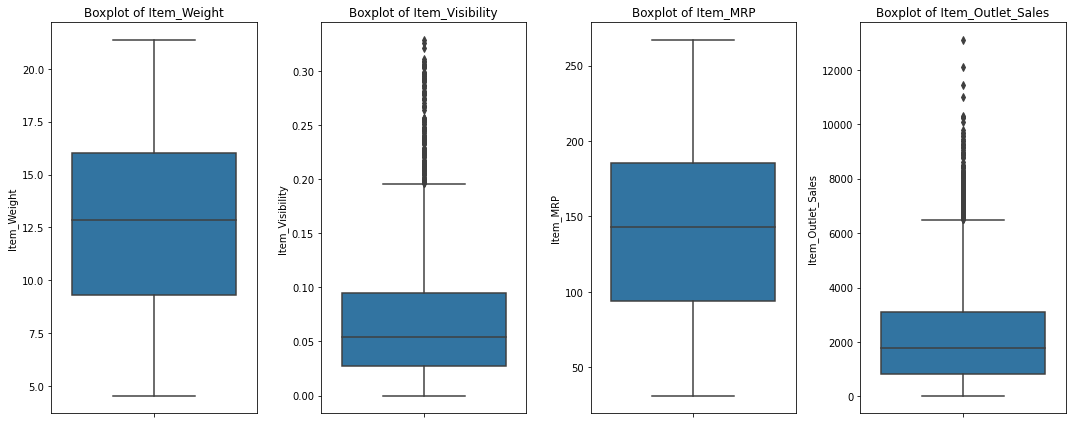

In [26]:
# Let's create a boxplot for numerical features to visualize outliers
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


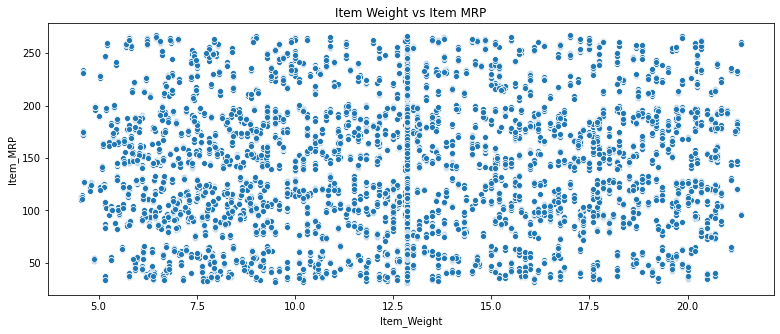

In [27]:
# For feature scales, we typically do scatter plots to visualize the relationship between features
# Here, we'll just do a few pair-wise scatter plots as an example
plt.figure(figsize=(13, 5))
sns.scatterplot(data=df, x='Item_Weight', y='Item_MRP')
plt.title('Item Weight vs Item MRP')
plt.show()

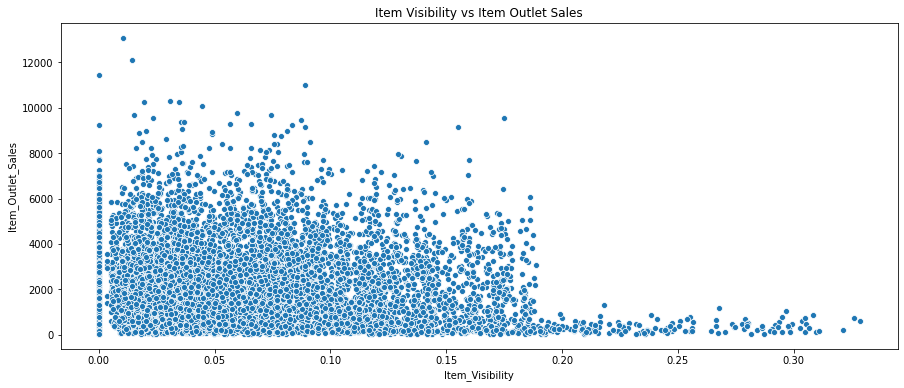

In [28]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales')
plt.title('Item Visibility vs Item Outlet Sales')
plt.show()

#### - Item Visibility vs Item Outlet Sales:-
The scatter plot does not show a clear linear relationship, and higher visibility does not necessarily lead to higher sales, which aligns with the low correlation seen earlier.
#### - Item Weight vs Item MRP:-
This scatter plot confirms that there is no apparent relationship between 'Item_Weight' and 'Item_MRP', indicating that the weight of an item does not influence its retail price.

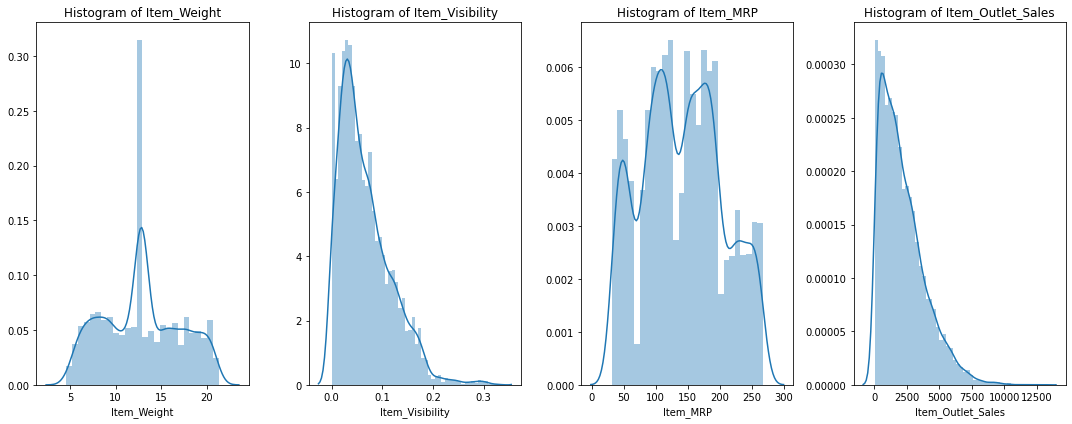

In [29]:
# Let's create histograms for numerical features to visualize skewness
plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.distplot(df[feature], kde=True, hist=True)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()


In [30]:
df_new=df

# Handling Skewness...
# Adjust zero values in 'Item_Visibility'
df_new['Item_Visibility'] = df_new['Item_Visibility'].replace(0, np.nan)
df_new['Item_Visibility'].fillna(df_new['Item_Visibility'].mean(), inplace=True)  # Replace NaNs with the mean

# Apply logarithmic transformation to 'Item_Visibility' and 'Item_Outlet_Sales' 
df_new['Item_Visibility'] = np.log(df_new['Item_Visibility'])
df_new['Item_Outlet_Sales'] = np.log(df_new['Item_Outlet_Sales'] + 1)  # Adding 1 to avoid log(0)


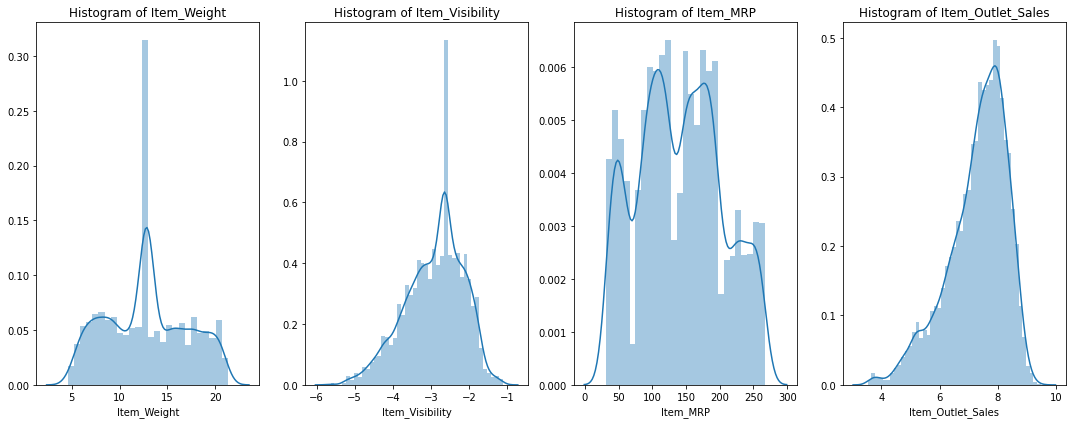

In [31]:
# now let's see the result after normalization...
plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.distplot(df_new[feature], kde=True, hist=True)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

#### Outliers & Scaling...

Although I was thinking about delete the outliers to not effect the model accurecy but instead of that I'll use the random forest and XGBoost models which're not be affected much by the outliers , beside that I think that the  data is real so maybe it'll be helpful in the future.

Also due to the scaling: as I intend to use Random Forest and XGBoost, I'll not need to scale cuz they do not depend on the magnitude of the variables; they rely on the rank ordering of variables.

In [32]:
# Encoding

categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df_new, columns=categorical_features)

# Display the first few rows of the new DataFrame to verify
df_encoded

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,-4.132215,249.8092,1999,8.225808,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.920,-3.948780,48.2692,2009,6.096776,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.500,-4.088756,141.6180,1999,7.648868,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.200,-2.652400,182.0950,1998,6.597664,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.930,-2.652400,53.8614,1987,6.903451,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-2.868511,214.5218,1987,7.929984,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,8.380,-3.057982,108.1570,2002,6.310436,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,10.600,-3.347099,85.1224,2004,7.085159,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8521,7.210,-1.929501,103.1332,2009,7.521100,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [33]:
# We'll do the same to the test data to work on it
# Handle missing values
test_df = test
test_df['Item_Weight'].fillna(mean_item_weight, inplace=True)  # Use the mean from the train set
test_df['Outlet_Size'].fillna('Unknown', inplace=True)  # Or the mode from the train set if that was used

# Handle skewness
# Apply the same transformations for skewness
test_df['Item_Visibility'] = test_df['Item_Visibility'].replace(0, np.nan)
test_df['Item_Visibility'].fillna(test_df['Item_Visibility'].mean(), inplace=True)
test_df['Item_Visibility'] = np.log(test_df['Item_Visibility'])

# One-Hot Encoding
# Use pd.get_dummies and make sure to align the columns with the training data
test_df_encoded = pd.get_dummies(test_df)
test_df_encoded = test_df_encoded.reindex(columns=df_encoded.drop('Item_Outlet_Sales', axis=1).columns, fill_value=0)

# Now test_df_encoded should have the same number of features as df_encoded (excluding 'Item_Outlet_Sales') and can be used for predictions

# Display the first few rows of the new DataFrame to verify
test_df_encoded

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,-4.884245,107.8622,1999,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,8.300000,-3.258977,87.3198,2007,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,14.600000,-2.306845,241.7538,1998,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,7.315000,-4.174142,155.0340,2007,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,12.857645,-2.132005,234.2300,1985,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,-4.305327,141.3154,1997,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5677,7.600000,-1.944974,169.1448,2009,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5678,10.000000,-2.610081,118.7440,2002,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5679,15.300000,-2.658751,214.6218,2007,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0


# 5- ML model

### Random Forest model

In [34]:
# Create a copy of my DataFrame
df_copy = df_encoded.copy()

# Replace "Item_Identifier" with row indices
df_copy['Item_Identifier'] = df_copy.index

# Split the data into features (X) and the target variable (y)
X = df_copy.drop('Item_Outlet_Sales', axis=1)
y = df_copy['Item_Outlet_Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define lists of hyperparameter values to try
n_estimators_values = [50, 150, 300]
max_depth_values = [None, 20, 50]
min_samples_split_values = [2, 10, 20]

# Initialize variables to store the best hyperparameters, metrics, and elapsed time
best_hyperparameters = None
best_metrics = {
    'mae': float('inf'),
    'rmse': float('inf'),
    'r2': -float('inf')
}
best_elapsed_time = float('inf')

# Loop over different hyperparameter combinations
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            start_time = time.time()  # Start timing

            # Initialize and train the Random Forest model with current hyperparameters
            rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
            rf_model.fit(X_train, y_train)

            # Make predictions on the test set
            rf_test_predictions = rf_model.predict(X_test)

            # Evaluate the Random Forest model
            mae = mean_absolute_error(y_test, rf_test_predictions)
            mse = mean_squared_error(y_test, rf_test_predictions)  # Calculate MSE
            rmse = np.sqrt(mse)  # Calculate RMSE from MSE
            r2 = r2_score(y_test, rf_test_predictions)

            # Check if current hyperparameters result in better metrics
            if r2 > best_metrics['r2']:
                best_metrics['mae'] = mae
                best_metrics['rmse'] = rmse
                best_metrics['r2'] = r2
                best_hyperparameters = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
                best_elapsed_time = time.time() - start_time  # Calculate elapsed time
                
            # Print evaluation metrics and execution time for the current hyperparameters
            print(f"Hyperparameters: n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}")
            print(f"MAE: {mae:.2f}")
            print(f"RMSE: {rmse:.2f}")
            print(f"R-squared: {r2:.2f}")
            print(f"Execution Time: {time.time() - start_time:.2f} seconds")
            print("---")

# Print the best hyperparameters, metrics, and elapsed time
print("Best Hyperparameters:")
print(best_hyperparameters)
print("Best Metrics:")
print(best_metrics)
print(f"Elapsed Time for Best Random Forest Model: {best_elapsed_time:.2f} seconds")


Hyperparameters: n_estimators=50, max_depth=None, min_samples_split=2
MAE: 0.42
RMSE: 0.54
R-squared: 0.72
Execution Time: 2.62 seconds
---
Hyperparameters: n_estimators=50, max_depth=None, min_samples_split=10
MAE: 0.42
RMSE: 0.53
R-squared: 0.73
Execution Time: 1.62 seconds
---
Hyperparameters: n_estimators=50, max_depth=None, min_samples_split=20
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 1.47 seconds
---
Hyperparameters: n_estimators=50, max_depth=20, min_samples_split=2
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 1.86 seconds
---
Hyperparameters: n_estimators=50, max_depth=20, min_samples_split=10
MAE: 0.42
RMSE: 0.53
R-squared: 0.73
Execution Time: 1.56 seconds
---
Hyperparameters: n_estimators=50, max_depth=20, min_samples_split=20
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 1.41 seconds
---
Hyperparameters: n_estimators=50, max_depth=50, min_samples_split=2
MAE: 0.42
RMSE: 0.54
R-squared: 0.72
Execution Time: 2.04 seconds
---
Hyperparameters: n_estim

### XGBoost model

In [35]:
# Define lists of hyperparameter values to try for XGBoost
n_estimators_values = [100, 200, 300]
max_depth_values = [3, 4, 5]
learning_rate_values = [0.01, 0.1, 0.2]

# Initialize variables to store the best hyperparameters, metrics, and elapsed time for XGBoost
best_xgb_hyperparameters = None
best_xgb_metrics = {
    'mae': float('inf'),
    'rmse': float('inf'),
    'r2': -float('inf')
}
best_xgb_elapsed_time = float('inf')

# Loop over different hyperparameter combinations for XGBoost
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for learning_rate in learning_rate_values:
            # Initialize and train the XGBoost model with current hyperparameters
            xgb_model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
            
            # Measure the start time
            start_time = time.time()
            
            xgb_model.fit(X_train, y_train)

            # Measure the end time
            end_time = time.time()

            # Calculate the elapsed time
            elapsed_time = end_time - start_time

            # Make predictions on the test set
            xgb_test_predictions = xgb_model.predict(X_test)

            # Evaluate the XGBoost model
            mae = mean_absolute_error(y_test, xgb_test_predictions)
            mse = mean_squared_error(y_test, xgb_test_predictions)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, xgb_test_predictions)

            # Check if current hyperparameters result in better metrics for XGBoost
            if mae < best_xgb_metrics['mae']:
                best_xgb_metrics['mae'] = mae
                best_xgb_metrics['rmse'] = rmse
                best_xgb_metrics['r2'] = r2
                best_xgb_hyperparameters = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}
                best_xgb_elapsed_time = elapsed_time

            # Print evaluation metrics and elapsed time for the current hyperparameters for XGBoost
            print(f"XGBoost Hyperparameters: n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate}")
            print(f"XGBoost MAE: {mae:.2f}")
            print(f"XGBoost RMSE: {rmse:.2f}")
            print(f"XGBoost R-squared: {r2:.2f}")
            print(f"Elapsed Time: {elapsed_time:.2f} seconds")
            print("---")

# Print the best hyperparameters, metrics, and elapsed time for XGBoost
print("Best XGBoost Hyperparameters:")
print(best_xgb_hyperparameters)
print("Best XGBoost Metrics:")
print(best_xgb_metrics)
print(f"Elapsed Time for Best XGBoost Model: {best_xgb_elapsed_time:.2f} seconds")


XGBoost Hyperparameters: n_estimators=100, max_depth=3, learning_rate=0.01
XGBoost MAE: 2.46
XGBoost RMSE: 2.54
XGBoost R-squared: -5.16
Elapsed Time: 0.35 seconds
---
XGBoost Hyperparameters: n_estimators=100, max_depth=3, learning_rate=0.1
XGBoost MAE: 0.40
XGBoost RMSE: 0.52
XGBoost R-squared: 0.74
Elapsed Time: 0.34 seconds
---
XGBoost Hyperparameters: n_estimators=100, max_depth=3, learning_rate=0.2
XGBoost MAE: 0.40
XGBoost RMSE: 0.52
XGBoost R-squared: 0.74
Elapsed Time: 0.34 seconds
---
XGBoost Hyperparameters: n_estimators=100, max_depth=4, learning_rate=0.01
XGBoost MAE: 2.47
XGBoost RMSE: 2.54
XGBoost R-squared: -5.15
Elapsed Time: 0.41 seconds
---
XGBoost Hyperparameters: n_estimators=100, max_depth=4, learning_rate=0.1
XGBoost MAE: 0.40
XGBoost RMSE: 0.52
XGBoost R-squared: 0.74
Elapsed Time: 0.41 seconds
---
XGBoost Hyperparameters: n_estimators=100, max_depth=4, learning_rate=0.2
XGBoost MAE: 0.41
XGBoost RMSE: 0.53
XGBoost R-squared: 0.74
Elapsed Time: 0.42 seconds
---


#### - Best Random Forest Hyperparameters:-

{'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 20}

Best Random Forest Metrics:

{'mae': 0.4099864341431982, 'rmse': 0.5275293377035322, 'r2': 0.7353034046668996}

Elapsed Time for Best Random Forest Model: 8.48 seconds



#### - Best XGBoost Hyperparameters:

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

Best XGBoost Metrics:

{'mae': 0.4001337982061839, 'rmse': 0.5184326659837052, 'r2': 0.7443535082776599}

Elapsed Time for Best XGBoost Model: 0.33 seconds


## So finally it seems that's the best result we get is XGBoost

using 

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

getting 

{'mae': 0.4001337982061839, 'rmse': 0.5184326659837052, 'r2': 0.7443535082776599}

costing

Time : 0.33 seconds

# Realizations:-

- the only term which is sounds clear that has a positive relation pattern with the outlet sales is Item MRP.
- XGBoost is the best way to use in our case (faster & less error & more accurate)
- I choosed these hyper-parameters based on the lowest average errors of the model, if we want to choose it depending on just the accuracy we should focus on R2.
- we can notice in the random forest model at some point as we keep increasing the samples in the model; it's increasing the costumed time but with no better accuracy (maybe even worse accurcy).

# Suggestions...
- if we have enough time we can train the data on another models like KNeighborsRegressor(), LinearRegression(), SVR(), Lasso() and see the best one..
then optimize its hyper-parameters and compare it with our XGBoost model.

- we can try some methods on the data to enhance the model result like: deleting all the items have null values to avoid any artifical data \ delete the outlinars to generalize the model as possible \ creating machine learning model to predict the missing data in the best way\ try to delete the features that have a very low (almost zero) correlation and see the effect on the model when it focus on just the correlated features.

- recommendation to data analysts\engineers : the best way to get the best result ever : using all the data which real not nulls or artifical beside using an equal sample from every term in every feature to get a fair perfect general model.